# 10Pearls Summer Internship Project
## Made by : Abtaal Aatif
### Role: Data Science Intern

### Importing necessary modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import numpy
import scipy
import sqlite3
%load_ext sql

# Module 1: Python

### Reading the dataset into a DataFrame:

In [2]:
df = pd.read_excel("Telco-Customer-Churn.xlsx")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7027     No  
7028     No  
7029     No  
7030    Yes  
7031     No  

[7032 rows x 21 columns]

### Viewing datatypes of all the columns:

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Summary of data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Statistical Summaries of Data:

In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Now including details for the non-numeric columns as well:

In [6]:
df.describe(include = "all")

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7032   7032    7032.000000    7032       7032  7032.000000   
unique        7032      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3549            NaN    3639       4933          NaN   
mean           NaN    NaN       0.162400     NaN        NaN    32.421786   
std            NaN    NaN       0.368844     NaN        NaN    24.545260   
min            NaN    NaN       0.000000     NaN        NaN     1.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7032          7032            7032           7032  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6352          3385            3096           3497  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7032             7032              7032    7032.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4168              2365            NaN   
mean               NaN              NaN               NaN      64.798208   
std                NaN              NaN               NaN      30.085974   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.587500   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.862500   
max                NaN              NaN               NaN     118.750000   

        TotalCharges  Churn  
count    7032.000000   7032  
unique           NaN      2  
top              NaN     No  
freq             NaN   5163  
mean     2283.300441    NaN  
std      2266.771362    NaN  
min        18.800000    NaN  
25%       401.450000    NaN  
50%      1397.475000    NaN  
75%      3794.737500    NaN  
max      8684.800000    NaN  

[11 rows x 21 columns]

The most common internet service is fiber optic. Furthermore, customers mostly seem to purchase month-to-month contracts.

## Data Preprocessing:

### Checking for Duplicates:

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

### Ensuring Columns are Correct Data Types:

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Yes, the datatypes set by Pandas seem to be sufficient.

The SeniorCitizen column is of type int64 yet it represents binary data. Let's convert it to 'uint8' as the rest of the categorical data will be converted to that as well.

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('uint8')

### Checking for Null/NaN values:

In [10]:
df.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for Empty Strings:

In [11]:
for col in df:
    print(col + ": ", (df[col] == '').sum())

customerID:  0
gender:  0
SeniorCitizen:  0
Partner:  0
Dependents:  0
tenure:  0
PhoneService:  0
MultipleLines:  0
InternetService:  0
OnlineSecurity:  0
OnlineBackup:  0
DeviceProtection:  0
TechSupport:  0
StreamingTV:  0
StreamingMovies:  0
Contract:  0
PaperlessBilling:  0
PaymentMethod:  0
MonthlyCharges:  0
TotalCharges:  0
Churn:  0


Thus, we can conclude that the data is now complete without any missing values. Now, we move on to the final stages of data preprocessing.

### Final Stages of Data Preprocessing:

In [12]:
pd.set_option('display.max_columns', None)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

We can one-hot encode all the object columns except for customerID. We will be dropping 1 of the one-hot encoded columns for each object column to reduce multicollinearity. We will also drop the customerID column as it is irrelevant to the current problem.

In [13]:
df_data = df.copy()
df = df.drop('customerID', axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### One-Hot Encoding:

In [14]:
temp_df = pd.get_dummies(df.select_dtypes(include = "object"), drop_first = True).astype('uint8')
temp_df

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               0            1               0                 0   
1               1            0               0                 1   
2               1            0               0                 1   
3               1            0               0                 0   
4               0            0               0                 1   
...           ...          ...             ...               ...   
7027            1            1               1                 1   
7028            0            1               1                 1   
7029            0            1               1                 0   
7030            1            1               0                 1   
7031            1            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  1                  0   
4                                  0                  0   
...                              ...                ...   
7027                               0                  1   
7028                               0                  1   
7029                               1                  0   
7030                               0                  1   
7031                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                      0                   0   
1                                      0                   1   
2                                      0                   1   
3                                      0                   1   
4                                      0                   0   
...                                  ...                 ...   
7027                                   0                   1   
7028                                   0                   0   
7029                                   0                   1   
7030                                   0                   0   
7031                                   0                   1   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                    0                 1   
1                                    0                 0   
2                                    0                 1   
3                                    0                 0   
4                                    0                 0   
...                                ...               ...   
7027                                 0                 0   
7028                                 0                 1   
7029                                 0                 0   
7030                                 0                 0   
7031                                 0                 0   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                        0                     0   
1                                        0                     1   
2                                        0                     0   
3                                

In [15]:
df2 = pd.concat([df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']], temp_df], axis = 1)
df2

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7027              0      24           84.80       1990.50            1   
7028              0      72          103.20       7362.90            0   
7029              0      11           29.60        346.45            0   
7030              1       4           74.40        306.60            1   
7031              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7027            1               1                 1   
7028            1               1                 1   
7029            1               1                 0   
7030            1               0                 1   
7031            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  1                  0   
4                                  0                  0   
...                              ...                ...   
7027                               0                  1   
7028                               0                  1   
7029                               1                  0   
7030                               0                  1   
7031                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                      0                   0   
1                                      0                   1   
2                                      0                   1   
3                                      0                   1   
4                                      0                   0   
...                                  ...                 ...   
7027                                   0                   1   
7028                                   0                   0   
7029                                   0                   1   
7030                                   0                   0   
7031                                   0                   1   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                    0                 1   
1                                    0                 0   
2                                    0                 1   
3                                    0               

In [16]:
df2.dtypes

SeniorCitizen                              uint8
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [17]:
df2.rename(columns = {'gender_Male': 'gender', 'Partner_Yes': 'Partner', 'Dependents_Yes': 'Dependents', 'PhoneService_Yes': 'PhoneService', 'PaperlessBilling_Yes': 'PaperlessBilling'}, inplace = True)
df2

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
0                 0       1           29.85         29.85       0        1   
1                 0      34           56.95       1889.50       1        0   
2                 0       2           53.85        108.15       1        0   
3                 0      45           42.30       1840.75       1        0   
4                 0       2           70.70        151.65       0        0   
...             ...     ...             ...           ...     ...      ...   
7027              0      24           84.80       1990.50       1        1   
7028              0      72          103.20       7362.90       0        1   
7029              0      11           29.60        346.45       0        1   
7030              1       4           74.40        306.60       1        1   
7031              0      66          105.65       6844.50       1        0   

      Dependents  PhoneService  MultipleLines_No phone service  \
0              0             0                               1   
1              0             1                               0   
2              0             1                               0   
3              0             0                               1   
4              0             1                               0   
...          ...           ...                             ...   
7027           1             1                               0   
7028           1             1                               0   
7029           1             0                               1   
7030           0             1                               0   
7031           0             1                               0   

      MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  \
0                     0                            0                   0   
1                     0                            0                   0   
2                     0                            0                   0   
3                     0                            0                   0   
4                     0                            1                   0   
...                 ...                          ...                 ...   
7027                  1                            0                   0   
7028                  1                            1                   0   
7029                  0                            0                   0   
7030                  1                            1                   0   
7031                  0                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                      0                   0   
1                                      0                   1   
2                                      0                   1   
3                                      0                   1   
4                                      0                   0   
...                                  ...                 ...   
7027                                   0                   1   
7028                                   0                   0   
7029                                   0                   1   
7030                                   0                   0   
7031                                   0                   1   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                    0                 1   
1                                    0                 0   
2                                    0                 1   
3                                    0                 0   
4                                    0                 0   
...                                ...               ...   
7027                                 0                 0   
7028                                 0                 1   
7029                                 0                

Now, we are left with normalization. We will perform it after EDA once we have split our dataset and feature engineered polynomial features.

Note: df contains the data without one-hot encoding while df2 contains the same data but with relevant columns one-hot encoded.

## Exploratory Data Analysis (EDA):

Viewing dataframe summary again:

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   uint8  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender                                 7032 non-null   uint8  
 5   Partner                                7032 non-null   uint8  
 6   Dependents                             7032 non-null   uint8  
 7   PhoneService                           7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

Now viewing all summary statistics:

In [19]:
df2.describe(include = 'all')

SeniorCitizen       tenure  MonthlyCharges  TotalCharges       gender  \
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000   
mean        0.162400    32.421786       64.798208   2283.300441     0.504693   
std         0.368844    24.545260       30.085974   2266.771362     0.500014   
min         0.000000     1.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.587500    401.450000     0.000000   
50%         0.000000    29.000000       70.350000   1397.475000     1.000000   
75%         0.000000    55.000000       89.862500   3794.737500     1.000000   
max         1.000000    72.000000      118.750000   8684.800000     1.000000   

           Partner   Dependents  PhoneService  MultipleLines_No phone service  \
count  7032.000000  7032.000000   7032.000000                     7032.000000   
mean      0.482509     0.298493      0.903299                        0.096701   
std       0.499729     0.457629      0.295571                        0.295571   
min       0.000000     0.000000      0.000000                        0.000000   
25%       0.000000     0.000000      1.000000                        0.000000   
50%       0.000000     0.000000      1.000000                        0.000000   
75%       1.000000     1.000000      1.000000                        0.000000   
max       1.000000     1.000000      1.000000                        1.000000   

       MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  \
count        7032.000000                  7032.000000         7032.000000   
mean            0.421928                     0.440273            0.216155   
std             0.493902                     0.496455            0.411650   
min             0.000000                     0.000000            0.000000   
25%             0.000000                     0.000000            0.000000   
50%             0.000000                     0.000000            0.000000   
75%             1.000000                     1.000000            0.000000   
max             1.000000                     1.000000            1.000000   

       OnlineSecurity_No internet service  OnlineSecurity_Yes  \
count                         7032.000000         7032.000000   
mean                             0.216155            0.286547   
std                              0.411650            0.452180   
min                              0.000000            0.000000   
25%                              0.000000            0.000000   
50%                              0.000000            0.000000   
75%                              0.000000            1.000000   
max                              1.000000            1.000000   

       OnlineBackup_No internet service  OnlineBackup_Yes  \
count                       7032.000000       7032.000000   
mean                           0.216155          0.344852   
std                            0.411650          0.475354   
min                            0.000000          0.000000   
25%                            0.000000          0.000000   
50%                            0.000000          0.000000   
75%                            0.000000          1.000000   
max                            1.000000          1.000000   

       DeviceProtection_No internet service  DeviceProtection_Yes  \
count                           7032.000000           7032.000000   
mean                               0.216155              0.343857   
std                                0.411650              0.475028   
min                                0.000000              0.000000   
25%                                0.000000              0.000000   
50%                                0.000000              0.000000   
75%                                0.000000              1.000000   
max                                1.000000              1.000000   

       TechSupport_No internet service  TechSupport_Yes  \
count                      7032.000000      7

Let's view the statistics for the float64 and int64 columns as the rest are binary data:

In [20]:
df2.select_dtypes(['int64', 'float64']).describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

The values in each column are on very different ranges and scales of magnitude. Thus, we will need to definitely perform scaling on all 3 columns as we intend on fitting a logistic regression model as well.

### Boxplot of the Relation between Churn and Tenure:

C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Churn', ylabel='tenure'>

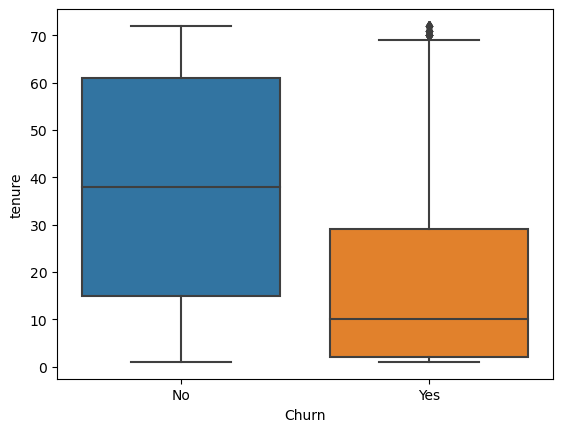

In [21]:
sns.boxplot(x = 'Churn', y = 'tenure', data = df)

It appears customers were more likely to churn if they had been with the service for approx 30 months (2.5 years) or less.

Note: As seen in the above plot, since we have a couple of outliers on the upper extreme for the "yes" group, we choose not to remove them.

### Boxplot of the Relation between Churn and Monthly Charges:

C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

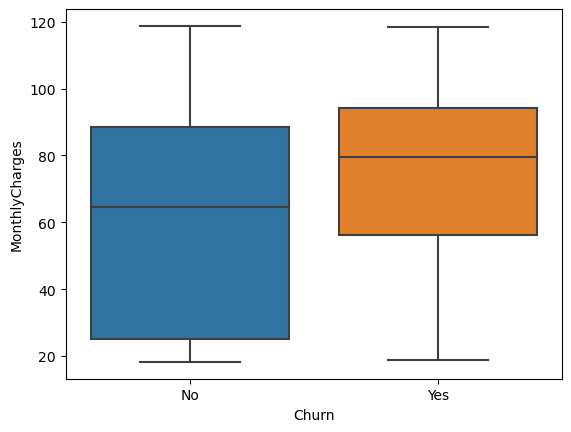

In [22]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)

It appears that customers with higher monthly charges were more likely to churn.

### Barplot of the Relation between Churn and Contract:

In [23]:
churn_contract = df[df.Churn == "Yes"].groupby("Contract").count()["Churn"]
churn_contract

Contract
Month-to-month    1655
One year           166
Two year            48
Name: Churn, dtype: int64

In [24]:
churn_contract.plot(kind = "bar", color = ['orange', 'skyblue', 'pink'])
plt.ylabel("Customers that Churned")
plt.title("Bar Plot of Customers Churned based on Contract Type")
plt.show()

We notice that a strong majority of customers that churned were those who purchased a month-to-month contract.

### Bar Plot of the Relation between Churn and Gender:

In [25]:
b1 = pd.DataFrame(df[df.Churn == "Yes"].groupby("gender")["Churn"].count()).rename(columns = {"Churn": "Count"})
b1["Churn"] = "Yes"

b2 = pd.DataFrame(df[df.Churn == "No"].groupby("gender")["Churn"].count()).rename(columns = {"Churn": "Count"})
b2["Churn"] = "No"

data = pd.concat([b1, b2], axis = 0).reset_index()
data
sns.catplot(x = "gender", y = "Count", data = data, hue = "Churn", kind = "bar")

C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

### Plotting Scatterplot to check for Collinearity:

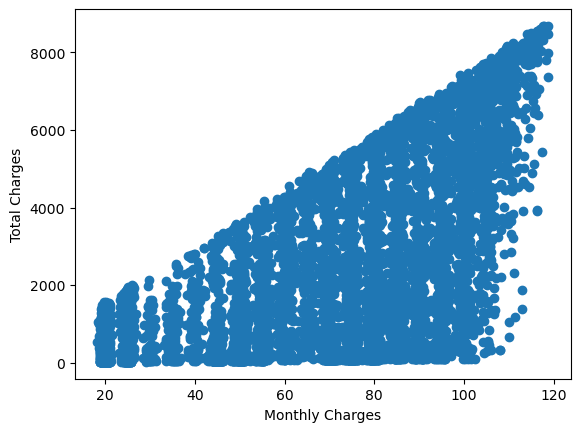

In [26]:
plt.scatter(df2['MonthlyCharges'], df2['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

We see a positive strong correlation. We will verify this with pearson's correlation coefficient.

In [27]:
scipy.stats.pearsonr(df2['MonthlyCharges'], df2['TotalCharges'])

PearsonRResult(statistic=0.6510648032262025, pvalue=0.0)

Its a moderately positive correlation with strong statistical significance. This makes sense as monthly charges accumulate to form total charges. The reason for a number of data points being scattered below a strong positive linear relationship (y = x) is because of the different types of contracts and tenures customers stayed with the company for.

### Viewing Correlation with HeatMap:

In [28]:
sns.heatmap(df.select_dtypes(["int64", "float64"]).corr(), annot = True)

<Axes: >

Besides total charges and monthly charges being positively correlated, we also notice that tenure and total charges are positively correlated as longer tenures mean more charges are accumulated.

## Feature Engineering:

In [29]:
df2.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
0              0       1           29.85         29.85       0        1   
1              0      34           56.95       1889.50       1        0   
2              0       2           53.85        108.15       1        0   
3              0      45           42.30       1840.75       1        0   
4              0       2           70.70        151.65       0        0   

   Dependents  PhoneService  MultipleLines_No phone service  \
0           0             0                               1   
1           0             1                               0   
2           0             1                               0   
3           0             0                               1   
4           0             1                               0   

   MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  \
0                  0                            0                   0   
1                  0                            0                   0   
2                  0                            0                   0   
3                  0                            0                   0   
4                  0                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling  \
0                  0                  0                 1   
1                  1                  0                 0   
2                  0                  0                 1   
3                  1                  0                 0   
4                  0                  0                 1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0 

We can create polynomial features of the originally numeric data (MonthlyCharges, TotalCharges, and Tenure).

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
temp = pd.DataFrame(poly.fit_transform(df2[["tenure", "MonthlyCharges", "TotalCharges"]]), columns = poly.get_feature_names_out())
df2.drop(["tenure", "MonthlyCharges", "TotalCharges"], axis = 1, inplace = True)
df2 = pd.concat([df2, temp], axis = 1)
df2

SeniorCitizen  gender  Partner  Dependents  PhoneService  \
0                 0       0        1           0             0   
1                 0       1        0           0             1   
2                 0       1        0           0             1   
3                 0       1        0           0             0   
4                 0       0        0           0             1   
...             ...     ...      ...         ...           ...   
7027              0       1        1           1             1   
7028              0       0        1           1             1   
7029              0       0        1           1             0   
7030              1       1        1           0             1   
7031              0       1        0           0             1   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  1                  0   
4                                  0                  0   
...                              ...                ...   
7027                               0                  1   
7028                               0                  1   
7029                               1                  0   
7030                               0                  1   
7031                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                      0                   0   
1                                      0                   1   
2                                      0                   1   
3                                      0                   1   
4                                      0                   0   
...                                  ...                 ...   
7027                                   0                   1   
7028                                   0                   0   
7029                                   0                   1   
7030                                   0                   0   
7031                                   0                   1   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                    0                 1   
1                                    0                 0   
2                                    0                 1   
3                                    0                 0   
4                                    0                 0   
...                                ...               ...   
7027                                 0                 0   
7028                                 0                 1   
7029                                 0                 0   
7030                                 0                 0   
7031                                 0                 0   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                        0                     0   
1                                        0                     1   
2                                        0                     0   
3                                        0               

### Evaluating Feature Importance:

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(df2.drop("Churn_Yes", axis = 1), df2["Churn_Yes"])
significance = tree.feature_importances_
drop_features = list()
for i, v in enumerate(significance):
    #if v == min(significance):
    if v <= 0.001:
        print("Least Important Feature: ")
        drop_features.append(df2.drop("Churn_Yes", axis = 1).columns[i])
    print(df2.drop("Churn_Yes", axis = 1).columns[i], ":", v)
    print()
print("Features with low importance:")
print(drop_features)

SeniorCitizen : 0.018038617227397264

gender : 0.019469342606084735

Partner : 0.018674238595079256

Dependents : 0.01574850359908619

Least Important Feature: 
PhoneService : 0.000244668705104327

MultipleLines_No phone service : 0.0019762985600248885

MultipleLines_Yes : 0.011707013384609772

InternetService_Fiber optic : 0.10736889315797436

Least Important Feature: 
InternetService_No : 0.0

Least Important Feature: 
OnlineSecurity_No internet service : 0.0

OnlineSecurity_Yes : 0.013229958224350405

Least Important Feature: 
OnlineBackup_No internet service : 0.0

OnlineBackup_Yes : 0.011353177345332165

Least Important Feature: 
DeviceProtection_No internet service : 0.0

DeviceProtection_Yes : 0.010431215773903222

TechSupport_No internet service : 0.007044756699794135

TechSupport_Yes : 0.010794306640153491

StreamingTV_No internet service : 0.0050040993846130885

StreamingTV_Yes : 0.008294240766971148

Least Important Feature: 
StreamingMovies_No internet service : 0.0

Stream

Since forests tend to overfit the data, I will only remove these features for the dataframe we will fit our forest on.

In [32]:
df_forest = df2.drop(drop_features, axis = 1)
df_forest = df_forest.drop(['tenure^2', 'MonthlyCharges^2', 'TotalCharges^2', 'MonthlyCharges TotalCharges', 'tenure TotalCharges', 'tenure MonthlyCharges', "Churn_Yes"], axis = 1)
df_forest.head()

SeniorCitizen  gender  Partner  Dependents  MultipleLines_No phone service  \
0              0       0        1           0                               1   
1              0       1        0           0                               0   
2              0       1        0           0                               0   
3              0       1        0           0                               1   
4              0       0        0           0                               0   

   MultipleLines_Yes  InternetService_Fiber optic  OnlineSecurity_Yes  \
0                  0                            0                   0   
1                  0                            0                   1   
2                  0                            0                   1   
3                  0                            0                   1   
4                  0                            1                   0   

   OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_No internet service  \
0                 1                     0                                0   
1                 0                     1                                0   
2                 1                     0                                0   
3                 0                     1                                0   
4                 0                     0                                0   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                                0                0   
2                0                                0                0   
3                1                                0                0   
4                0                                0                0   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0                  1                  0   
2                    0                  0                  0   
3                    0                  1                  0   
4                    0                  0                  0   

   PaperlessBilling  PaymentMethod_Credit card (automatic)  \
0                 1                                      0   
1                 0                                      0   
2                 1                                      0   
3                 0                                      0   
4                 1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  tenure  \
0                               1                           0     1.0   
1                               0                           1    34.0   
2                               0                           1     2.0   
3                               0                           0    45.0   
4                               1                           0     2.0   

   MonthlyCharges  TotalCharges  
0           29.85         29.85  
1           56.95       1889.50  
2           53.85        108.15  
3           42.30       1840.75  
4           70.70        151.65

# Module 2: AI Algorithm

### Splitting DataSet and Normalizing Data:

Importing modules for measuring performance, cross-validation, and normalization:

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, f1_score

Data before splitting and normalization:

In [34]:
df2 = df2.rename(columns = {"Churn_Yes": "Churn"})
Y = df2["Churn"]
X = df2.drop("Churn", axis = 1)
X_tree = df_forest

Splitting data:

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 10)
X_tree_train, X_tree_test, Y_tree_train, Y_tree_test = train_test_split(X_tree, Y, train_size = 0.75, random_state = 10)

Scaling the data:

In [36]:
scaler = StandardScaler()
scaler_tree = StandardScaler()
# training data:
X_train[poly.get_feature_names_out()] = scaler.fit_transform(X_train[poly.get_feature_names_out()])
X_tree_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler_tree.fit_transform(X_tree_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
# test data:
X_test[poly.get_feature_names_out()] = scaler.transform(X_test[poly.get_feature_names_out()])
X_tree_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler_tree.transform(X_tree_test[['tenure', 'MonthlyCharges', 'TotalCharges']])
# scaling original data
X[poly.get_feature_names_out()] = scaler.fit_transform(X[poly.get_feature_names_out()])
X_tree[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler_tree.fit_transform(X_tree[['tenure', 'MonthlyCharges', 'TotalCharges']])

Storing our PolynomialFeatures and StandardScaler objects to pickle files:

In [37]:
import pickle
with open('poly_features.pkl', 'wb') as f:
    pickle.dump(poly, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Model Selection:

We have 2 versions of the dataset for different kinds of models:
1. df2 for most of the models.
2. df_forest for tree-based models having dropped features with 0 importance.

Now we can begin evaluating different machine learning models for classification.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import GridSearchCV
results = pd.DataFrame(columns = ["cross-validation score", "trained accuracy", "trained precision", "trained recall", "trained F1", "trained ROC-AUC"])

### Logistic Regression

In [39]:
lm = LogisticRegression(solver="liblinear", max_iter=10000)
# calculating out-of-sample performance:
cv_score = cross_val_score(lm, X, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
lm.fit(X_train, Y_train)
yhat = lm.predict(X_test)
yhat_proba = lm.predict_proba(X_test)[:, 1]
# calculating other metrics:
logistic_accuracy = accuracy_score(Y_test, yhat)
logistic_precision = precision_score(Y_test, yhat)
logistic_recall = recall_score(Y_test, yhat)
logistic_f1 = f1_score(Y_test, yhat)
logistic_roc_auc = roc_auc_score(Y_test, yhat_proba)
print()
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("ROC-AUC:", logistic_roc_auc)
results.loc["Logistic Regression"] = [cv_score.mean(), logistic_accuracy, logistic_precision, logistic_recall, logistic_f1, logistic_roc_auc]

Cross-validation score: 0.8068822336092072

Accuracy: 0.8077360637087599
Precision: 0.6564885496183206
Recall: 0.559652928416486
F1 Score: 0.6042154566744731
ROC-AUC: 0.8615384744036381


Using data after dropping features via tree:

In [40]:
lm2 = LogisticRegression(solver="liblinear", max_iter=10000)
# calculating out-of-sample performance:
cv_score = cross_val_score(lm2, X_tree, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
lm2.fit(X_tree_train, Y_tree_train)
yhat = lm2.predict(X_tree_test)
yhat_proba = lm2.predict_proba(X_tree_test)[:, 1]
# calculating other metrics:
logistic_accuracy = accuracy_score(Y_tree_test, yhat)
logistic_precision = precision_score(Y_tree_test, yhat)
logistic_recall = recall_score(Y_tree_test, yhat)
logistic_f1 = f1_score(Y_tree_test, yhat)
logistic_roc_auc = roc_auc_score(Y_tree_test, yhat_proba)
print()
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("ROC-AUC:", logistic_roc_auc)

Cross-validation score: 0.8033274602353548

Accuracy: 0.8100113765642776
Precision: 0.6545012165450121
Recall: 0.5835140997830802
F1 Score: 0.6169724770642201
ROC-AUC: 0.8608577779190089


Confusion Matrix for Logistic Regression:

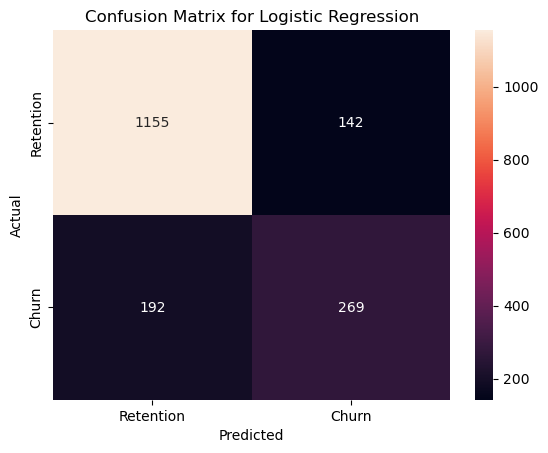

In [41]:
confusion = confusion_matrix(Y_test, yhat)
sns.heatmap(confusion, annot = True, fmt='d', xticklabels=['Retention', 'Churn'], yticklabels=['Retention', 'Churn'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC curve for Logistic Regression:

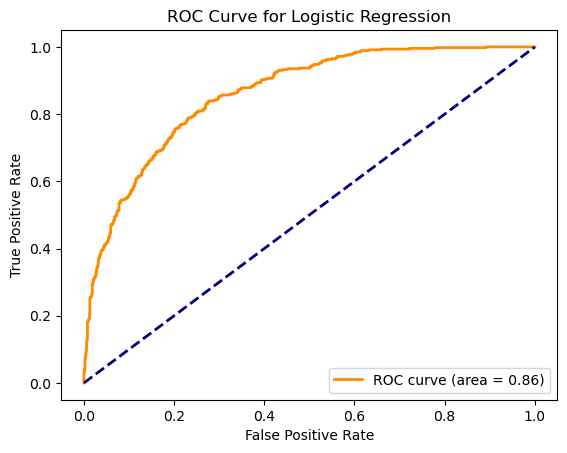

In [42]:
fpr, tpr, thresh = roc_curve(Y_test, yhat_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, yhat_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve for Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve for Logistic Regression:

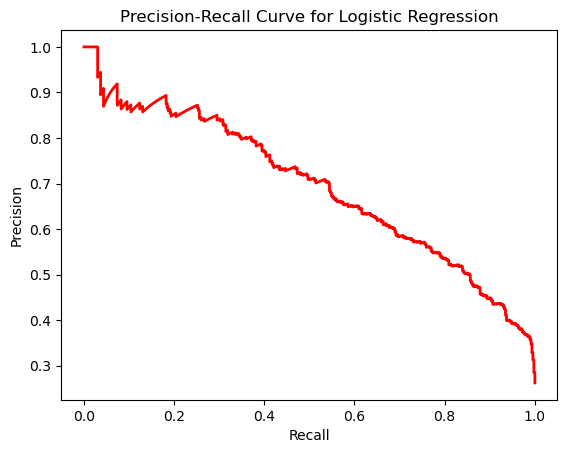

In [43]:
precision, recall, thresh = precision_recall_curve(Y_test, yhat_proba)
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()

Classification Report for Logistic Regression:

In [44]:
report = classification_report(Y_test, yhat, target_names=['Retention', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Retention       0.86      0.89      0.87      1297
       Churn       0.65      0.58      0.62       461

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.75      1758
weighted avg       0.80      0.81      0.81      1758



Now, we can train the model on the entire dataset:

In [45]:
lm.fit(X, Y)
lm.score(X, Y)

0.810580204778157

### Decision Tree

In [46]:
tree = DecisionTreeClassifier(random_state = 10)
# calculating out-of-sample performance:
cv_score = cross_val_score(tree, X, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
tree.fit(X_train, Y_train)
yhat = tree.predict(X_test)
yhat_proba = tree.predict_proba(X_test)[:, 1]
# calculating other metrics:
decision_tree_accuracy = accuracy_score(Y_test, yhat)
decision_tree_precision = precision_score(Y_test, yhat)
decision_tree_recall = recall_score(Y_test, yhat)
decision_tree_f1 = f1_score(Y_test, yhat)
decision_tree_roc_auc = roc_auc_score(Y_test, yhat_proba)
print()
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)
print("ROC-AUC:", decision_tree_roc_auc)
results.loc["Decision Tree Classifier"] = [cv_score.mean(), decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1, decision_tree_roc_auc]

Cross-validation score: 0.7280993388723652

Accuracy: 0.7366325369738339
Precision: 0.49794238683127573
Recall: 0.5249457700650759
F1 Score: 0.5110876451953537
ROC-AUC: 0.6685593485383422


Confusion Matrix for Decision Tree:

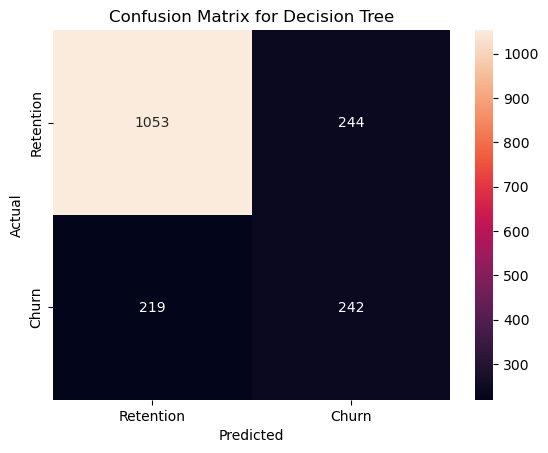

In [47]:
confusion = confusion_matrix(Y_test, yhat)
sns.heatmap(confusion, annot = True, fmt='d', xticklabels=['Retention', 'Churn'], yticklabels=['Retention', 'Churn'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve for Decision Tree:

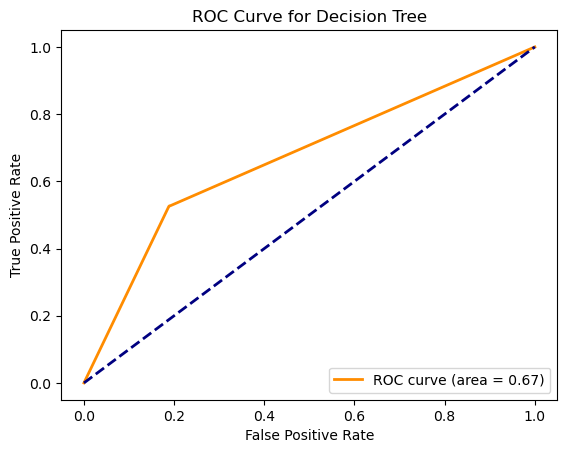

In [48]:
fpr, tpr, thresh = roc_curve(Y_test, yhat_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, yhat_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve for Decision Tree")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve for Decision Tree:

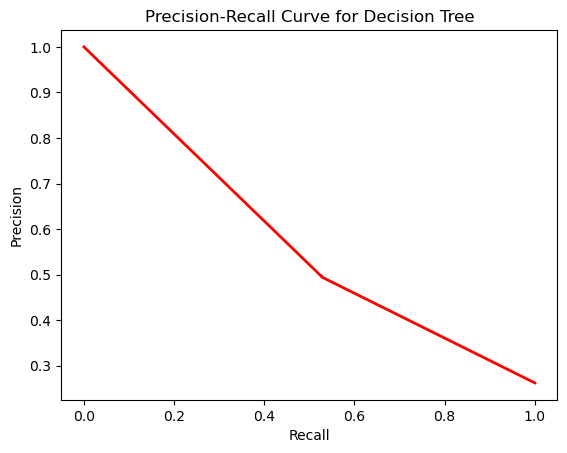

In [49]:
precision, recall, thresh = precision_recall_curve(Y_test, yhat_proba)
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.show()

Classification Report for Decision Tree:

In [50]:
report = classification_report(Y_test, yhat, target_names=['Retention', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Retention       0.83      0.81      0.82      1297
       Churn       0.50      0.52      0.51       461

    accuracy                           0.74      1758
   macro avg       0.66      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758



Now we can train the model on the entire dataset:

In [51]:
tree.fit(X, Y)
tree.score(X, Y)

0.9974402730375427

Using data after dropping features via tree:

In [52]:
tree2 = DecisionTreeClassifier(random_state = 10)
# calculating out-of-sample performance:
cv_score = cross_val_score(tree2, X_tree, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
tree2.fit(X_tree_train, Y_tree_train)
yhat = tree2.predict(X_tree_test)
yhat_proba = tree2.predict_proba(X_tree_test)[:, 1]
# calculating other metrics:
decision_tree_accuracy = accuracy_score(Y_test, yhat)
decision_tree_precision = precision_score(Y_test, yhat)
decision_tree_recall = recall_score(Y_test, yhat)
decision_tree_f1 = f1_score(Y_test, yhat)
decision_tree_roc_auc = roc_auc_score(Y_test, yhat_proba)
print()
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)
print("ROC-AUC:", decision_tree_roc_auc)
results.loc["Decision Tree Classifier"] = [cv_score.mean(), decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1, decision_tree_roc_auc]

Cross-validation score: 0.7262517376826587

Accuracy: 0.7372013651877133
Precision: 0.49894736842105264
Recall: 0.5140997830802603
F1 Score: 0.5064102564102564
ROC-AUC: 0.6656249947735222


### Random Forest

In [53]:
forest = RandomForestClassifier(random_state = 10)
# calculating out-of-sample performance:
cv_score = cross_val_score(forest, X, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
forest.fit(X_train, Y_train)
yhat = forest.predict(X_test)
yhat_proba = forest.predict_proba(X_test)[:, 1]
# calculating other metrics:
forest_accuracy = accuracy_score(Y_test, yhat)
forest_precision = precision_score(Y_test, yhat)
forest_recall = recall_score(Y_test, yhat)
forest_f1 = f1_score(Y_test, yhat)
forest_roc_auc = roc_auc_score(Y_test, yhat_proba)
print()
print("Accuracy:", forest_accuracy)
print("Precision:", forest_precision)
print("Recall:", forest_recall)
print("F1 Score:", forest_f1)
print("ROC-AUC:", forest_roc_auc)
results.loc["Random Forest Classifier"] = [cv_score.mean(), forest_accuracy, forest_precision, forest_recall, forest_f1, forest_roc_auc]

Cross-validation score: 0.7896729115479116

Accuracy: 0.7923777019340159
Precision: 0.6243523316062176
Recall: 0.5227765726681128
F1 Score: 0.5690672963400236
ROC-AUC: 0.8339694305396903


Confusion Matrix for Random Forest:

In [54]:
confusion = confusion_matrix(Y_test, yhat)
sns.heatmap(confusion, annot = True, fmt='d', xticklabels=['Retention', 'Churn'], yticklabels=['Retention', 'Churn'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve for Random Forest:

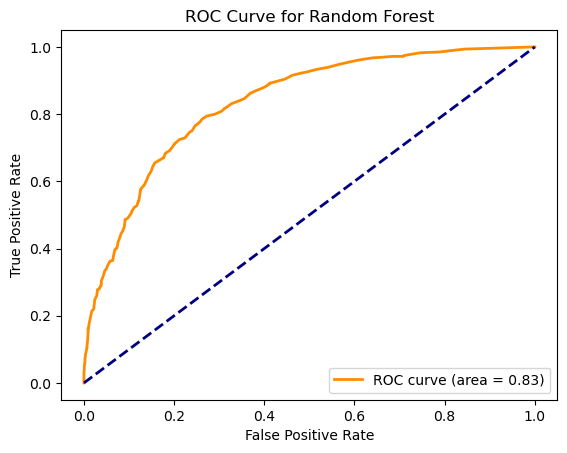

In [55]:
fpr, tpr, thresh = roc_curve(Y_test, yhat_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, yhat_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve for Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve for Random Forest:

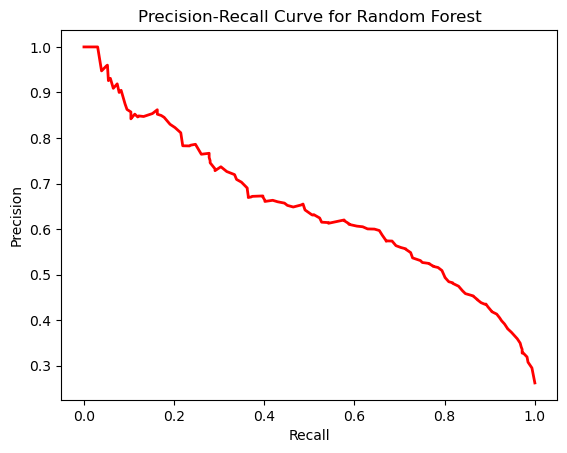

In [56]:
precision, recall, thresh = precision_recall_curve(Y_test, yhat_proba)
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.show()

Classification Report for Random Forest:

In [57]:
report = classification_report(Y_test, yhat, target_names=['Retention', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Retention       0.84      0.89      0.86      1297
       Churn       0.62      0.52      0.57       461

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



Now, we can train the model on the entire dataset:

In [58]:
forest.fit(X, Y)
forest.score(X, Y)

0.9974402730375427

### Gradient Boosting

In [59]:
gradient_boost = GradientBoostingClassifier(random_state = 10)
# calculating out-of-sample performance:
cv_score = cross_val_score(gradient_boost, X, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
gradient_boost.fit(X_train, Y_train)
yhat = gradient_boost.predict(X_test)
yhat_proba = gradient_boost.predict_proba(X_test)[:, 1]
# calculating other metrics:
gradient_boost_accuracy = accuracy_score(Y_test, yhat)
gradient_boost_precision = precision_score(Y_test, yhat)
gradient_boost_recall = recall_score(Y_test, yhat)
gradient_boost_f1 = f1_score(Y_test, yhat)
gradient_boost_roc_auc = roc_auc_score(Y_test, yhat_proba)
print()
print("Accuracy:", gradient_boost_accuracy)
print("Precision:", gradient_boost_precision)
print("Recall:", gradient_boost_recall)
print("F1 Score:", gradient_boost_f1)
print("ROC-AUC:", gradient_boost_roc_auc)
results.loc["Gradient Boosting Classifier"] = [cv_score.mean(), gradient_boost_accuracy, gradient_boost_precision, gradient_boost_recall, gradient_boost_f1, gradient_boost_roc_auc]

Cross-validation score: 0.8037501616448985

Accuracy: 0.8111490329920364
Precision: 0.6684073107049608
Recall: 0.5553145336225597
F1 Score: 0.6066350710900473
ROC-AUC: 0.8577227274019638


Confusion Matrix for Gradient Boosting:

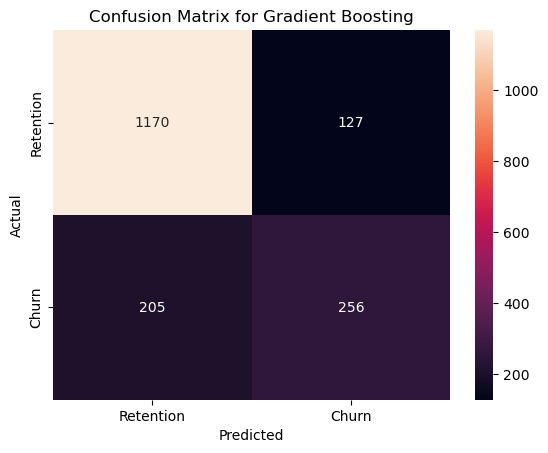

In [60]:
confusion = confusion_matrix(Y_test, yhat)
sns.heatmap(confusion, annot = True, fmt='d', xticklabels=['Retention', 'Churn'], yticklabels=['Retention', 'Churn'])
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve for Gradient Boosting:

In [61]:
fpr, tpr, thresh = roc_curve(Y_test, yhat_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, yhat_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve for Gradient Boosting")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve for Gradient Boosting:

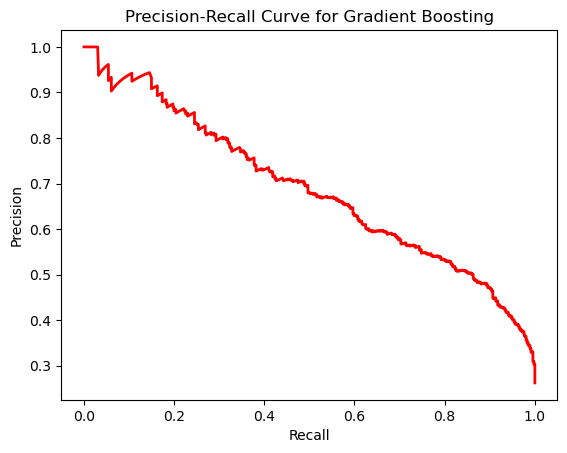

In [62]:
precision, recall, thresh = precision_recall_curve(Y_test, yhat_proba)
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.show()

Classification Report for Gradient Boosting:

In [63]:
report = classification_report(Y_test, yhat, target_names=['Retention', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Retention       0.85      0.90      0.88      1297
       Churn       0.67      0.56      0.61       461

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.81      1758



Now, we can train the model on the entire dataset:

In [64]:
gradient_boost.fit(X, Y)
gradient_boost.score(X, Y)

0.8275028441410694

### Support Vector Machine

In [65]:
svm = SVC(probability = True, random_state = 10)
# calculating out-of-sample performance:
cv_score = cross_val_score(svm, X, Y, cv = 10)
print("Cross-validation score:", cv_score.mean())
# fitting and prediction:
svm.fit(X_train, Y_train)
yhat = svm.predict(X_test)
yhat_proba = svm.predict_proba(X_test)[:, 1]
# calculating other metrics:
svm_accuracy = accuracy_score(Y_test, yhat)
svm_precision = precision_score(Y_test, yhat)
svm_recall = recall_score(Y_test, yhat)
svm_f1 = f1_score(Y_test, yhat)
svm_roc_auc = roc_auc_score(Y_test, yhat_proba)
print()
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("ROC-AUC:", svm_roc_auc)
results.loc["Support Vector Machine"] = [cv_score.mean(), svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc]

Cross-validation score: 0.8010494795034269

Accuracy: 0.8088737201365188
Precision: 0.6934984520123839
Recall: 0.48590021691973967
F1 Score: 0.5714285714285714
ROC-AUC: 0.8249472752907177


Confusion Matrix for Support Vector Machine:

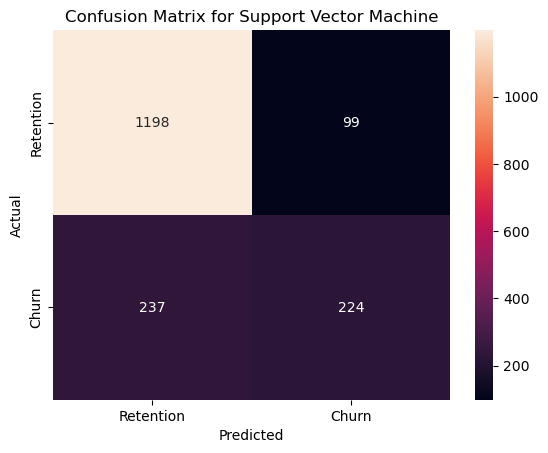

In [66]:
confusion = confusion_matrix(Y_test, yhat)
sns.heatmap(confusion, annot = True, fmt='d', xticklabels=['Retention', 'Churn'], yticklabels=['Retention', 'Churn'])
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve for Support Vector Machine:

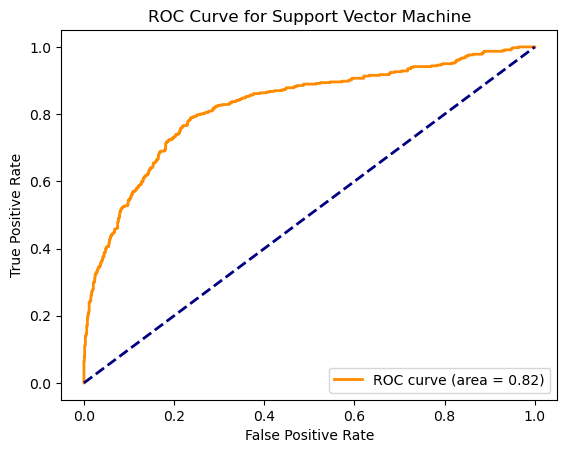

In [67]:
fpr, tpr, thresh = roc_curve(Y_test, yhat_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, yhat_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve for Support Vector Machine")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve for Support Vector Machine:

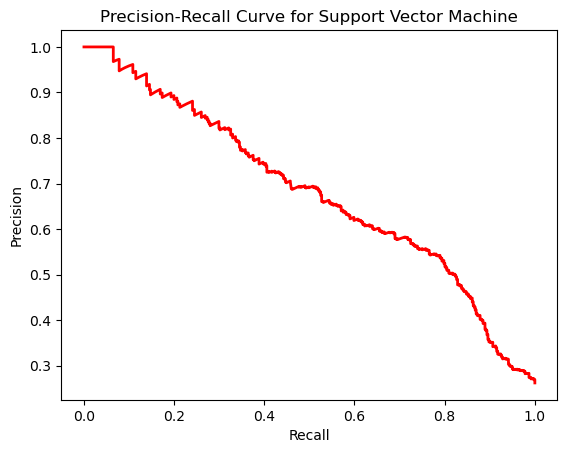

In [68]:
precision, recall, thresh = precision_recall_curve(Y_test, yhat_proba)
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine')
plt.show()

Classification Report for Support Vector Machine:

In [69]:
report = classification_report(Y_test, yhat, target_names=['Retention', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Retention       0.83      0.92      0.88      1297
       Churn       0.69      0.49      0.57       461

    accuracy                           0.81      1758
   macro avg       0.76      0.70      0.72      1758
weighted avg       0.80      0.81      0.80      1758



Now, we can train the model on the entire dataset:

In [70]:
svm.fit(X, Y)
svm.score(X, Y)

0.810580204778157

## Grid Search

We will perform Grid Search on the model that performed best on the given dataset. To figure this out, lets compare the scores amongst the models:

In [71]:
results

cross-validation score  trained accuracy  \
Logistic Regression                         0.806882          0.807736   
Decision Tree Classifier                    0.726252          0.737201   
Random Forest Classifier                    0.789673          0.792378   
Gradient Boosting Classifier                0.803750          0.811149   
Support Vector Machine                      0.801049          0.808874   

                              trained precision  trained recall  trained F1  \
Logistic Regression                    0.656489        0.559653    0.604215   
Decision Tree Classifier               0.498947        0.514100    0.506410   
Random Forest Classifier               0.624352        0.522777    0.569067   
Gradient Boosting Classifier           0.668407        0.555315    0.606635   
Support Vector Machine                 0.693498        0.485900    0.571429   

                              trained ROC-AUC  
Logistic Regression                  0.861538  
Decision Tree Classifier             0.665625  
Random Forest Classifier             0.833969  
Gradient Boosting Classifier         0.857723  
Support Vector Machine               0.824947

Based on the above metrics, we can conclude that the Gradient Boosting Classifier is the most suitable model, followed closely by logistic regression. While logistic regression has a higher cross-validation score, Gradient Boosting performs better across more metrics including f1 and accuracy (on a particular train_test_split). Due to how well both these models performed compared to the others, we will consider both of them for grid search and then compare them again for the better model.

In [72]:
# parameters to test for gradient boosting
gb_param = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4]
}
# parameters to test for logistic regression
lr_param = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cholesky', 'lbfgs', 'liblinear'],
}

In [73]:
# grid search on Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gridsearch_gb = GridSearchCV(gb, gb_param, cv = 5, scoring = 'accuracy')
gridsearch_gb.fit(X, Y)
print("Completed grid search for gradient boosting classifier")
# grid search on Logistic Regression
lr = LogisticRegression(max_iter=10000)
gridsearch_lr = GridSearchCV(lr, lr_param, cv = 5, scoring = 'accuracy')
gridsearch_lr.fit(X, Y)
print("Completed grid search for logistic regression")

Completed grid search for gradient boosting classifier
Completed grid search for logistic regression


Grid Search results for Gradient Boosting Classifier:

In [74]:
print("Best score:", gridsearch_gb.best_score_)
print("Best Parameters:", gridsearch_gb.best_params_)

Best score: 0.8044632557594065
Best Parameters: {'max_depth': 3, 'n_estimators': 100}


Grid Search results for Logistic Regression:

In [75]:
print("Best score:", gridsearch_lr.best_score_)
print("Best Parameters:", gridsearch_lr.best_params_)

Best score: 0.8068828788388883
Best Parameters: {'C': 1, 'solver': 'newton-cholesky'}


Logistic Regression performs slightly better than gradient boosting, thus we will be using logistic regression for making predictions using this best combination of hyperparameters.

In [76]:
best_model = gridsearch_lr.best_estimator_
best_model

LogisticRegression(C=1, max_iter=10000, solver='newton-cholesky')

In [77]:
best_model.fit(X, Y)

LogisticRegression(C=1, max_iter=10000, solver='newton-cholesky')

## Model Interpretation

In [78]:
import shap

C:\Users\Abtal-Basil\anaconda3\envs\pymc5_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


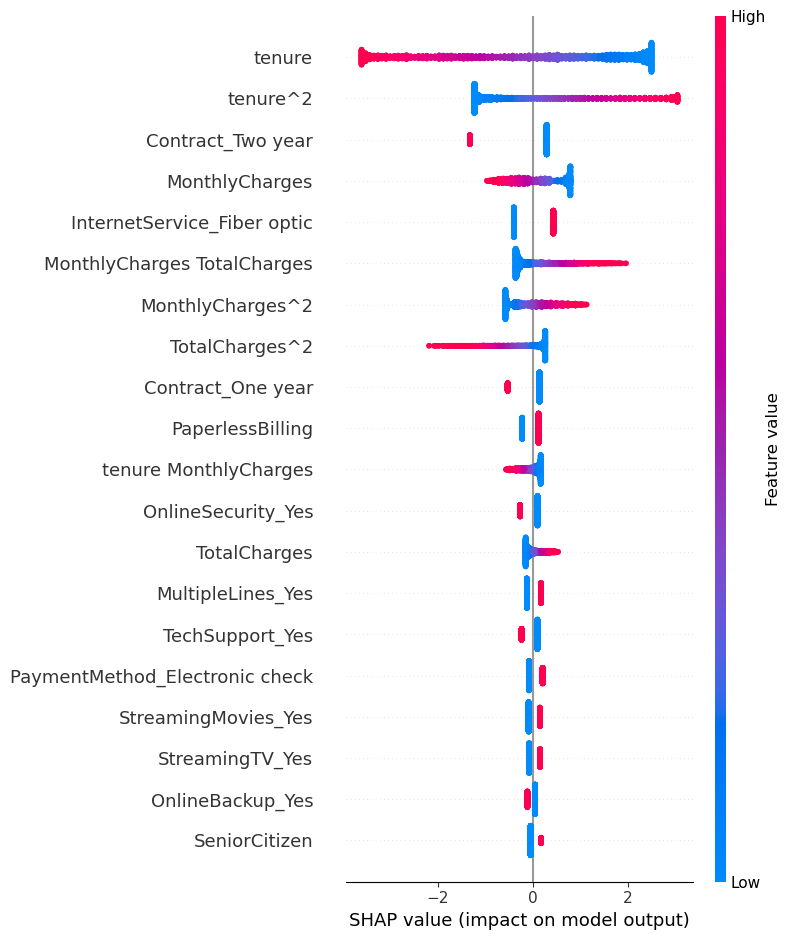

In [79]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

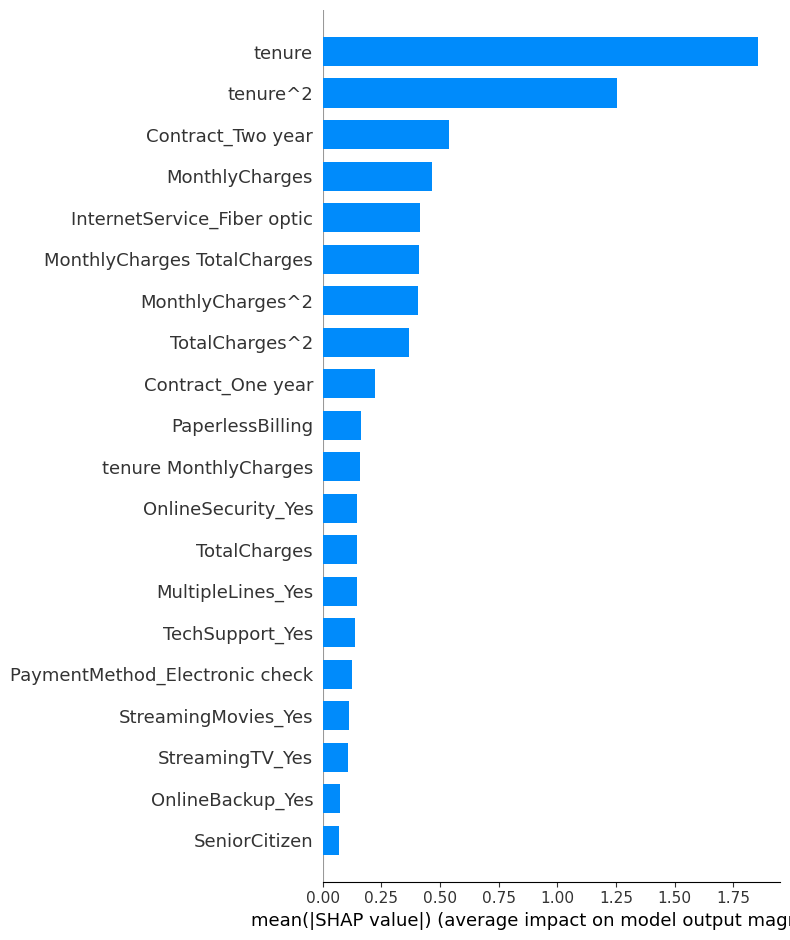

In [80]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Based on SHAP, we can conclude that tenure (and thus tenure^2), as well as contract_Two Year and Monthly charges are of greater significance to the model for making predictions.

## Storing the Model

In [81]:
# Save the model to a file
model_filename = 'best_logistic_regression_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Module 3: SQL

In [82]:
import sqlite3

In [83]:
df_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [84]:
# Connecting to the database
conn = sqlite3.connect('Telco_Customer_Churn_Data.db')
cursor = conn.cursor()

In [85]:
df_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Schema

We can break the dataset into a number of tables including a table for customer data, a table for services availed by each customer, a table for customer contract details, and a table for billing. We additionally create a table for storing churn data and our corresponding predictions.

In [86]:
# Creating tables if they already don't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS customers (
    customer_id VARCHAR(10) PRIMARY KEY,
    gender VARCHAR(10),
    senior_citizen INT,
    partner VARCHAR(10),
    dependents VARCHAR(10),
    tenure INT
)
''')

# Create services table
cursor.execute('''
CREATE TABLE IF NOT EXISTS services (
    service_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id VARCHAR(10),
    phone_service VARCHAR(10),
    multiple_lines VARCHAR(50),
    internet_service VARCHAR(50),
    online_security VARCHAR(50),
    online_backup VARCHAR(50),
    device_protection VARCHAR(50),
    tech_support VARCHAR(50),
    streaming_tv VARCHAR(50),
    streaming_movies VARCHAR(50),
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
)
''')

# Create contracts table
cursor.execute('''
CREATE TABLE IF NOT EXISTS contracts (
    contract_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id VARCHAR(10),
    contract_type VARCHAR(50),
    paperless_billing VARCHAR(10),
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
)
''')

# Create billing table
cursor.execute('''
CREATE TABLE IF NOT EXISTS billing (
    billing_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id VARCHAR(10),
    payment_method VARCHAR(50),
    monthly_charges FLOAT,
    total_charges FLOAT,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
)
''')

# Create predictions table
cursor.execute('''
CREATE TABLE IF NOT EXISTS churn (
    churn_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id VARCHAR(10),
    churn VARCHAR(10),
    predicted_churn VARCHAR(10),
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
)
''')

In [87]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('customers',), ('services',), ('sqlite_sequence',), ('contracts',), ('billing',), ('churn',)]


In [88]:
# # below code will drop all tables
# cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = cursor.fetchall()
# # Drop each table
# for table in tables:
#     if table[0] == 'sqlite_sequence':
#         continue
#     cursor.execute(f"DROP TABLE IF EXISTS {table[0]}")
#     print(f"Table {table[0]} deleted.")

## Storing the Dataset in the Database

### Customer Data

In [89]:
customers_df = df_data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']]
customers_df.rename(columns={'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents'}, inplace=True)
customers_df.to_sql('customers', conn, if_exists='append', index=False)

C:\Users\Abtal-Basil\AppData\Local\Temp\ipykernel_2496\529919718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df.rename(columns={'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents'}, inplace=True)


7032

### Services Data

In [90]:
services_df = df_data[['customerID', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
services_df.rename(columns={'customerID': 'customer_id', 'PhoneService': 'phone_service', 'MultipleLines': 'multiple_lines', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'}, inplace=True)
services_df.to_sql('services', conn, if_exists='append', index=False)

C:\Users\Abtal-Basil\AppData\Local\Temp\ipykernel_2496\3588417042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  services_df.rename(columns={'customerID': 'customer_id', 'PhoneService': 'phone_service', 'MultipleLines': 'multiple_lines', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'}, inplace=True)


7032

### Contracts Data

In [91]:
# Insert data into contracts table
contracts_df = df_data[['customerID', 'Contract', 'PaperlessBilling']]
contracts_df.rename(columns={'customerID': 'customer_id', 'Contract': 'contract_type', 'PaperlessBilling': 'paperless_billing'}, inplace=True)
contracts_df.to_sql('contracts', conn, if_exists='append', index=False)

C:\Users\Abtal-Basil\AppData\Local\Temp\ipykernel_2496\1991441682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contracts_df.rename(columns={'customerID': 'customer_id', 'Contract': 'contract_type', 'PaperlessBilling': 'paperless_billing'}, inplace=True)


7032

### Billing Data

In [92]:
billing_df = df_data[['customerID', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
billing_df.rename(columns={'customerID': 'customer_id', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'}, inplace=True)
billing_df.to_sql('billing', conn, if_exists='append', index=False)

C:\Users\Abtal-Basil\AppData\Local\Temp\ipykernel_2496\332187300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billing_df.rename(columns={'customerID': 'customer_id', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'}, inplace=True)


7032

### Churn Data

In [93]:
df_pred = best_model.predict(X)
df_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [94]:
df_pred = map(lambda x: "Yes" if x == 1 else "No", df_pred)
df_pred = pd.DataFrame(list(df_pred), columns = ["PredictedChurn"])
df_pred

PredictedChurn
0               Yes
1                No
2                No
3                No
4               Yes
...             ...
7027             No
7028             No
7029             No
7030            Yes
7031             No

[7032 rows x 1 columns]

In [95]:
billing_df = df_data[['customerID', 'Churn']]
billing_df = pd.concat([billing_df, df_pred], axis = 1)
billing_df.rename(columns={'customerID': 'customer_id', 'Churn': 'churn', 'PredictedChurn': 'predicted_churn'}, inplace=True)
billing_df.to_sql('churn', conn, if_exists = 'append', index = False)

7032

In [96]:
# Closing connections
cursor.close()
conn.close()

## Using SQL Magic to Run Queries

In [97]:
%load_ext sql
%sql sqlite:///Telco_Customer_Churn_Data.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Customer with largest tenure

In [98]:
%%sql
select *
from customers
order by tenure DESC
LIMIT 1

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('5248-YGIJN', 'Male', 0, 'Yes', 'No', 72)]

### Total Revenue Accumulated:

In [99]:
%%sql
select SUM(total_charges) as Total_Revenue
FROM billing

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[(16056168.7,)]

### Average Customer Tenure

In [100]:
%%sql
select AVG(tenure) as average_tenure
FROM customers

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[(32.421786120591584,)]

### Total Customers

In [101]:
%%sql
select COUNT(*) as [number of customers]
FROM customers

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[(7032,)]

### Total Current Customers

In [102]:
%%sql
select churn.churn, COUNT(*)
FROM customers INNER JOIN churn on customers.customer_id = churn.customer_id
GROUP BY churn.churn

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('No', 5163), ('Yes', 1869)]

In [103]:
%%sql
select churn.churn, COUNT(*)
FROM customers INNER JOIN churn on customers.customer_id = churn.customer_id
where churn = 'No'
GROUP BY churn.churn

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('No', 5163)]

### Average Monthly Charges and Churn

In [104]:
%%sql
select AVG(monthly_charges) as average_monthly_charges, churn.churn
FROM churn INNER JOIN billing
ON churn.customer_id = billing.customer_id
GROUP BY churn.churn

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[(61.307408483439865, 'No'), (74.44133226324237, 'Yes')]

### Customers that availed a service

In [105]:
%%sql
select phone_service, internet_service, COUNT(*)
from services
GROUP BY phone_service, internet_service

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('No', 'DSL', 680),
 ('Yes', 'DSL', 1736),
 ('Yes', 'Fiber optic', 3096),
 ('Yes', 'No', 1520)]

## Advanced SQL Analysis

### Churn based on Phone Service and Internet Service

In [106]:
%%sql
select phone_service, internet_service, COUNT(churn.customer_id)
FROM services INNER JOIN churn on churn.customer_id = services.customer_id
WHERE churn.churn = "Yes"
GROUP BY phone_service, internet_service

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('No', 'DSL', 170),
 ('Yes', 'DSL', 289),
 ('Yes', 'Fiber optic', 1297),
 ('Yes', 'No', 113)]

### Contracts chosen by Customers

In [107]:
%%sql
select contract_type, COUNT(*) as number_of_customers
FROM customers INNER JOIN contracts
ON customers.customer_id = contracts.customer_id
GROUP BY contract_type

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('Month-to-month', 3875), ('One year', 1472), ('Two year', 1685)]

In [108]:
%%sql
select churn.churn, churn.predicted_churn, COUNT(churn.churn)
FROM churn
GROUP BY churn.churn, churn.predicted_churn

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('No', 'No', 4683),
 ('No', 'Yes', 480),
 ('Yes', 'No', 853),
 ('Yes', 'Yes', 1016)]

### Running Total of Monthly Charges

In [109]:
%%sql
select customers.customer_id, monthly_charges, SUM(monthly_charges) OVER(ORDER BY customers.customer_id) as [Monthly Charges Running Total]
FROM customers INNER JOIN billing on customers.customer_id = billing.customer_id

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('0002-ORFBO', 65.6, 65.6),
 ('0003-MKNFE', 59.9, 125.5),
 ('0004-TLHLJ', 73.9, 199.4),
 ('0011-IGKFF', 98.0, 297.4),
 ('0013-EXCHZ', 83.9, 381.3),
 ('0013-MHZWF', 69.4, 450.7),
 ('0013-SMEOE', 109.7, 560.4),
 ('0014-BMAQU', 84.65, 645.0500000000001),
 ('0015-UOCOJ', 48.2, 693.25),
 ('0016-QLJIS', 90.45, 783.7),
 ('0017-DINOC', 45.2, 828.9),
 ('0017-IUDMW', 116.8, 945.7),
 ('0018-NYROU', 68.95, 1014.65),
 ('0019-EFAEP', 101.3, 1115.95),
 ('0019-GFNTW', 45.05, 1161.0),
 ('0020-INWCK', 95.75, 1256.75),
 ('0020-JDNXP', 61.25, 1318.0),
 ('0021-IKXGC', 72.1, 1390.1),
 ('0022-TCJCI', 62.7, 1452.8),
 ('0023-HGHWL', 25.1, 1477.9),
 ('0023-UYUPN', 25.2, 1503.1),
 ('0023-XUOPT', 94.1, 1597.2),
 ('0027-KWYKW', 83.75, 1680.95),
 ('0030-FNXPP', 19.85, 1700.8),
 ('0031-PVLZI', 20.35, 1721.15),
 ('0032-PGELS', 30.5, 1751.65),
 ('0036-IHMOT', 103.7, 1855.35),
 ('0040-HALCW', 20.4, 1875.75),
 ('0042-JVWOJ', 19.6, 1895.35),
 ('0042-RLHYP', 19.7, 1915.05),
 ('0048-LUMLS', 91.2, 2006.25),
 ('0048-PIHNL', 20.45, 2026.7),
 ('0052-DCKON', 115.8, 2142.5),
 ('0052-YNYOT', 20.55, 2163.05),
 ('0056-EPFBG', 39.4, 2202.45),
 ('0057-QBUQH', 25.1, 2227.55),
 ('0058-EVZWM', 89.8, 2317.35),
 ('0060-FUALY', 94.75, 2412.1),
 ('0064-SUDOG', 20.3, 2432.4),
 ('0064-YIJGF', 75.75, 2508.15),
 ('0067-DKWBL', 49.25, 2557.4),
 ('0068-FIGTF', 78.2, 2635.6),
 ('0071-NDAFP', 25.5, 2661.1),
 ('0074-HDKDG', 61.6, 2722.7),
 ('0076-LVEPS', 45.0, 2767.7),
 ('0078-XZMHT', 85.15, 2852.85),
 ('0080-EMYVY', 51.45, 2904.3),
 ('0080-OROZO', 99.25, 3003.55),
 ('0082-LDZUE', 44.3, 3047.85),
 ('0082-OQIQY', 94.2, 3142.05),
 ('0083-PIVIK', 81.25, 3223.3),
 ('0089-IIQKO', 99.95, 3323.25),
 ('0093-EXYQL', 91.55, 3414.8),
 ('0093-XWZFY', 104.5, 3519.3),
 ('0094-OIFMO', 95.0, 3614.3),
 ('0096-BXERS', 50.35, 3664.65),
 ('0096-FCPUF', 64.5, 3729.15),
 ('0098-BOWSO', 19.4, 3748.55),
 ('0100-DUVFC', 104.8, 3853.35),
 ('0103-CSITQ', 109.4, 3962.75),
 ('0104-PPXDV', 50.3, 4013.05),
 ('0106-GHRQR', 71.4, 4084.45),
 ('0106-UGRDO', 116.0, 4200.45),
 ('0107-WESLM', 19.85, 4220.3),
 ('0107-YHINA', 99.75, 4320.05),
 ('0111-KLBQG', 93.95, 4414.0),
 ('0112-QAWRZ', 90.8, 4504.8),
 ('0112-QWPNC', 84.35, 4589.15),
 ('0114-IGABW', 58.25, 4647.4),
 ('0114-PEGZZ', 107.55, 4754.95),
 ('0114-RSRRW', 19.95, 4774.9),
 ('0115-TFERT', 111.2, 4886.1),
 ('0117-LFRMW', 40.2, 4926.3),
 ('0118-JPNOY', 85.8, 5012.1),
 ('0121-SNYRK', 35.4, 5047.5),
 ('0122-OAHPZ', 73.85, 5121.35),
 ('0123-CRBRT', 88.1, 5209.45),
 ('0125-LZQXK', 101.35, 5310.8),
 ('0128-MKWSG', 45.8, 5356.6),
 ('0129-KPTWJ', 94.65, 5451.25),
 ('0129-QMPDR', 20.5, 5471.75),
 ('0130-SXOUN', 89.4, 5561.15),
 ('0133-BMFZO', 86.25, 5647.4),
 ('0134-XWXCE', 74.85, 5722.25),
 ('0135-NMXAP', 89.75, 5812.0),
 ('0136-IFMYD', 109.95, 5921.95),
 ('0137-OCGAB', 80.2, 6002.15),
 ('0137-UDEUO', 19.85, 6022.0),
 ('0139-IVFJG', 90.35, 6112.35),
 ('0141-YEAYS', 86.45, 6198.8),
 ('0142-GVYSN', 20.3, 6219.1),
 ('0147-ESWWR', 101.25, 6320.35),
 ('0148-DCDOS', 94.7, 6415.05),
 ('0151-ONTOV', 70.9, 6485.95),
 ('0156-FVPTA', 54.2, 6540.15),
 ('0164-APGRB', 114.9, 6655.05),
 ('0164-XAIRP', 19.55, 6674.6),
 ('0168-XZKBB', 86.85, 6761.45),
 ('0174-QRVVY', 25.35, 6786.8),
 ('0177-PXBAT', 109.9, 6896.7),
 ('0178-CIIKR', 19.95, 6916.65),
 ('0178-SZBHO', 87.2, 7003.85),
 ('0181-RITDD', 108.15, 7112.0),
 ('0186-CAERR', 116.3, 7228.3),
 ('0187-QSXOE', 89.0, 7317.3),
 ('0187-WZNAB', 74.4, 7391.7),
 ('0188-GWFLE', 20.05, 7411.75),
 ('0191-EQUUH', 35.05, 7446.8),
 ('0191-ZHSKZ', 74.75, 7521.55),
 ('0193-ESZXP', 105.5, 7627.05),
 ('0195-IESCP', 85.25, 7712.3),
 ('0196-JTUQI', 75.2, 7787.5),
 ('0196-VULGZ', 84.35, 7871.85),
 ('0197-PNKNK', 84.45, 7956.3),
 ('0201-MIBOL', 102.4, 8058.7),
 ('0201-OAMXR', 115.55, 8174.25),
 ('0203-HHYIJ', 25.3, 8199.55),
 ('0206-OYVOC', 19.25, 8218.8),
 ('0206-TBWLC', 114.65, 8333.45),
 ('0207-MDKNV', 105.1, 8438.55),
 ('0208-BPQEJ', 19.4, 8457.95),
 ('0212-ISBBF', 50.35, 8508.3),
 ('0214-JHPFW', 57.8, 8566.1),
 ('0215-BQKGS', 84.3, 8650.4),
 ('0218-QNVAS', 100.5

### Moving Average of Monthly Charges

In [110]:
%%sql
select customers.customer_id, monthly_charges, AVG(monthly_charges) OVER(ORDER BY customers.customer_id) as [Monthly Charges Moving Average]
FROM customers INNER JOIN billing on customers.customer_id = billing.customer_id

 * sqlite:///Telco_Customer_Churn_Data.db
Done.


[('0002-ORFBO', 65.6, 65.6),
 ('0003-MKNFE', 59.9, 62.75),
 ('0004-TLHLJ', 73.9, 66.46666666666667),
 ('0011-IGKFF', 98.0, 74.35),
 ('0013-EXCHZ', 83.9, 76.26),
 ('0013-MHZWF', 69.4, 75.11666666666666),
 ('0013-SMEOE', 109.7, 80.05714285714285),
 ('0014-BMAQU', 84.65, 80.63125000000001),
 ('0015-UOCOJ', 48.2, 77.02777777777777),
 ('0016-QLJIS', 90.45, 78.37),
 ('0017-DINOC', 45.2, 75.35454545454546),
 ('0017-IUDMW', 116.8, 78.80833333333334),
 ('0018-NYROU', 68.95, 78.05),
 ('0019-EFAEP', 101.3, 79.71071428571429),
 ('0019-GFNTW', 45.05, 77.4),
 ('0020-INWCK', 95.75, 78.546875),
 ('0020-JDNXP', 61.25, 77.52941176470588),
 ('0021-IKXGC', 72.1, 77.22777777777777),
 ('0022-TCJCI', 62.7, 76.46315789473684),
 ('0023-HGHWL', 25.1, 73.89500000000001),
 ('0023-UYUPN', 25.2, 71.57619047619048),
 ('0023-XUOPT', 94.1, 72.60000000000001),
 ('0027-KWYKW', 83.75, 73.08478260869565),
 ('0030-FNXPP', 19.85, 70.86666666666666),
 ('0031-PVLZI', 20.35, 68.846),
 ('0032-PGELS', 30.5, 67.37115384615385),
 ('0036-IHMOT', 103.7, 68.71666666666667),
 ('0040-HALCW', 20.4, 66.99107142857143),
 ('0042-JVWOJ', 19.6, 65.35689655172413),
 ('0042-RLHYP', 19.7, 63.835),
 ('0048-LUMLS', 91.2, 64.71774193548387),
 ('0048-PIHNL', 20.45, 63.334375),
 ('0052-DCKON', 115.8, 64.92424242424242),
 ('0052-YNYOT', 20.55, 63.61911764705883),
 ('0056-EPFBG', 39.4, 62.927142857142854),
 ('0057-QBUQH', 25.1, 61.8763888888889),
 ('0058-EVZWM', 89.8, 62.63108108108108),
 ('0060-FUALY', 94.75, 63.47631578947368),
 ('0064-SUDOG', 20.3, 62.369230769230775),
 ('0064-YIJGF', 75.75, 62.70375),
 ('0067-DKWBL', 49.25, 62.37560975609756),
 ('0068-FIGTF', 78.2, 62.75238095238095),
 ('0071-NDAFP', 25.5, 61.8860465116279),
 ('0074-HDKDG', 61.6, 61.87954545454545),
 ('0076-LVEPS', 45.0, 61.50444444444444),
 ('0078-XZMHT', 85.15, 62.018478260869564),
 ('0080-EMYVY', 51.45, 61.7936170212766),
 ('0080-OROZO', 99.25, 62.57395833333334),
 ('0082-LDZUE', 44.3, 62.20102040816327),
 ('0082-OQIQY', 94.2, 62.841),
 ('0083-PIVIK', 81.25, 63.20196078431373),
 ('0089-IIQKO', 99.95, 63.90865384615385),
 ('0093-EXYQL', 91.55, 64.43018867924529),
 ('0093-XWZFY', 104.5, 65.17222222222223),
 ('0094-OIFMO', 95.0, 65.71454545454546),
 ('0096-BXERS', 50.35, 65.44017857142858),
 ('0096-FCPUF', 64.5, 65.42368421052632),
 ('0098-BOWSO', 19.4, 64.6301724137931),
 ('0100-DUVFC', 104.8, 65.31101694915255),
 ('0103-CSITQ', 109.4, 66.04583333333333),
 ('0104-PPXDV', 50.3, 65.78770491803279),
 ('0106-GHRQR', 71.4, 65.87822580645161),
 ('0106-UGRDO', 116.0, 66.67380952380952),
 ('0107-WESLM', 19.85, 65.9421875),
 ('0107-YHINA', 99.75, 66.46230769230769),
 ('0111-KLBQG', 93.95, 66.87878787878788),
 ('0112-QAWRZ', 90.8, 67.2358208955224),
 ('0112-QWPNC', 84.35, 67.4875),
 ('0114-IGABW', 58.25, 67.35362318840579),
 ('0114-PEGZZ', 107.55, 67.92785714285714),
 ('0114-RSRRW', 19.95, 67.25211267605633),
 ('0115-TFERT', 111.2, 67.86250000000001),
 ('0117-LFRMW', 40.2, 67.48356164383561),
 ('0118-JPNOY', 85.8, 67.73108108108109),
 ('0121-SNYRK', 35.4, 67.3),
 ('0122-OAHPZ', 73.85, 67.38618421052632),
 ('0123-CRBRT', 88.1, 67.6551948051948),
 ('0125-LZQXK', 101.35, 68.08717948717948),
 ('0128-MKWSG', 45.8, 67.80506329113925),
 ('0129-KPTWJ', 94.65, 68.140625),
 ('0129-QMPDR', 20.5, 67.55246913580247),
 ('0130-SXOUN', 89.4, 67.81890243902438),
 ('0133-BMFZO', 86.25, 68.04096385542168),
 ('0134-XWXCE', 74.85, 68.12202380952381),
 ('0135-NMXAP', 89.75, 68.37647058823529),
 ('0136-IFMYD', 109.95, 68.85988372093023),
 ('0137-OCGAB', 80.2, 68.99022988505747),
 ('0137-UDEUO', 19.85, 68.43181818181819),
 ('0139-IVFJG', 90.35, 68.67808988764045),
 ('0141-YEAYS', 86.45, 68.87555555555556),
 ('0142-GVYSN', 20.3, 68.34175824175824),
 ('0147-ESWWR', 101.25, 68.69945652173914),
 ('0148-DCDOS', 94.7, 68.97903225806452),
 ('0151-ONTOV', 70.9, 68.99946808510639),
 ('0156-FVPTA', 54.2, 68.8436842105263),
 ('0164-APGRB', 114.9, 69.3234375),
 ('0164-XAIRP', 19.55, 68.81030927835052),
 ('0168-XZKBB', 86.85, 68.99438775510204),
 ('0174-QRVVY', 25.35

## Summary Report based on findings from SQL Queries

1. Most customers joined a service using a month-to-month contract. Those customers thay decided to stay with the company far longer tended to 2 year contracts over 1 year contracts.
2. Our logistic regression model correctly predicted 4683 customers that were retained and 1016 customers that churned.
3. Customers that churned appeared to have payed higher monthly charges on average.
4. Most customers chose to opt for both a phone service and a fiber optic internet service (3096 customers)
5. More customers churned who were using both the phone service and fiber optic.
6. Customers had an average tenure of 32.4 months.

# Module 4: Model Deployment and API Consumption

## Flask Setup

In [111]:
# !pip install flask

We will be using flask to create a web application and API. For the frontend a folder called templates is created containing an index.html file to display. The web application itself is written into the app.py file.

## Model Integration

The below code in the app.py file includes:
1. The importing of necessary modules.
2. Loading model and preprocessing tools from pickle files.
3. Exposing API endpoints.

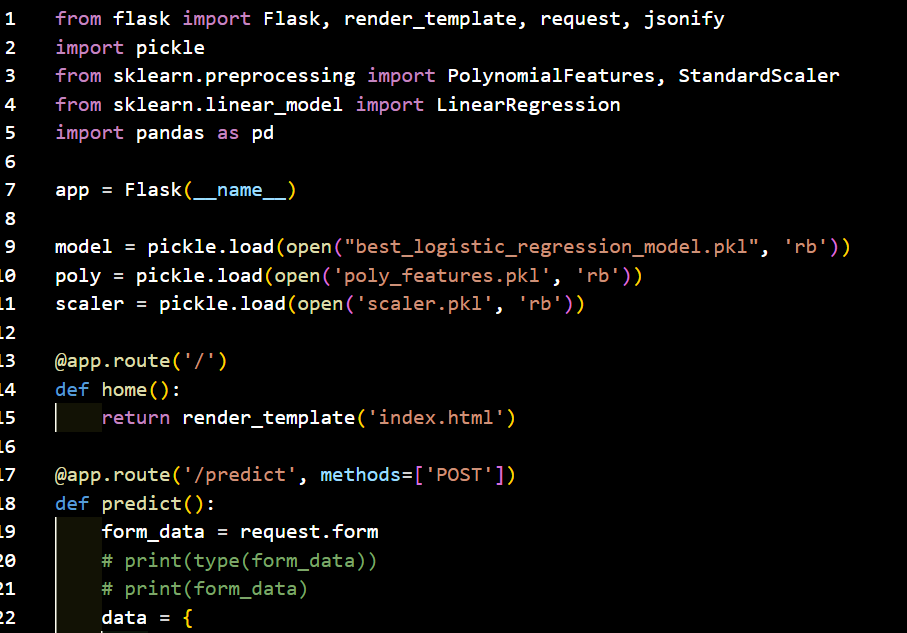

## API Development

### /predict

Our /predict endpoint performs and returns predictions in the following manner:
1. Take user input and store it in a dictionary (and later on, DataFrame).
   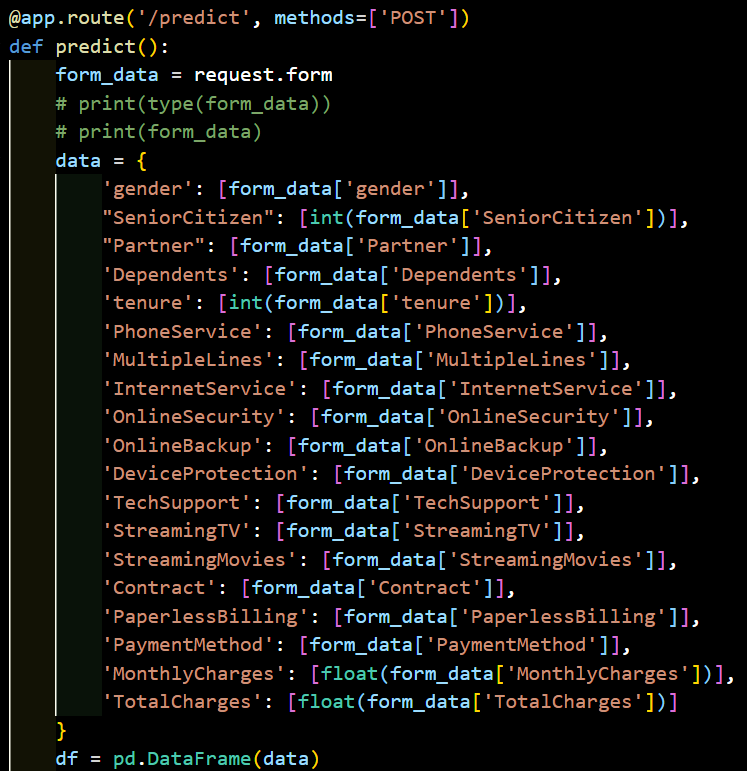
3. One Hot Encoding of categorical input.
4. Feature engineering of Polynomial Features.
5. Feature scaling of the data.
6. Feeding data to model to perform prediction.
7. Returning prediction as a JSON for API requests (as well as on frontend if using web app).
   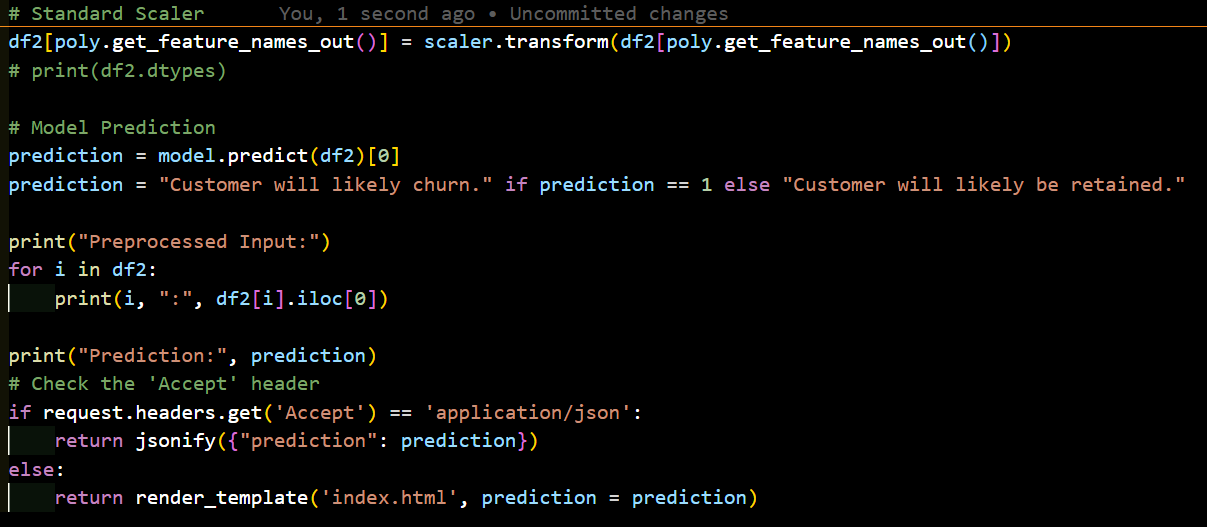

### /healthcheck

Using GET on the /healthcheck endpoint will have it return a health_status JSON object to show the API is working properly.


## Testing and Validation

### /predict

We first test the front end web app to see that it successfully displays predictions.

Now we test the API endpoint itself using postman:

Thus, we can conclude that /predict is working properly.

### /healthcheck

We use postman to confirm /healthcheck is working properly:

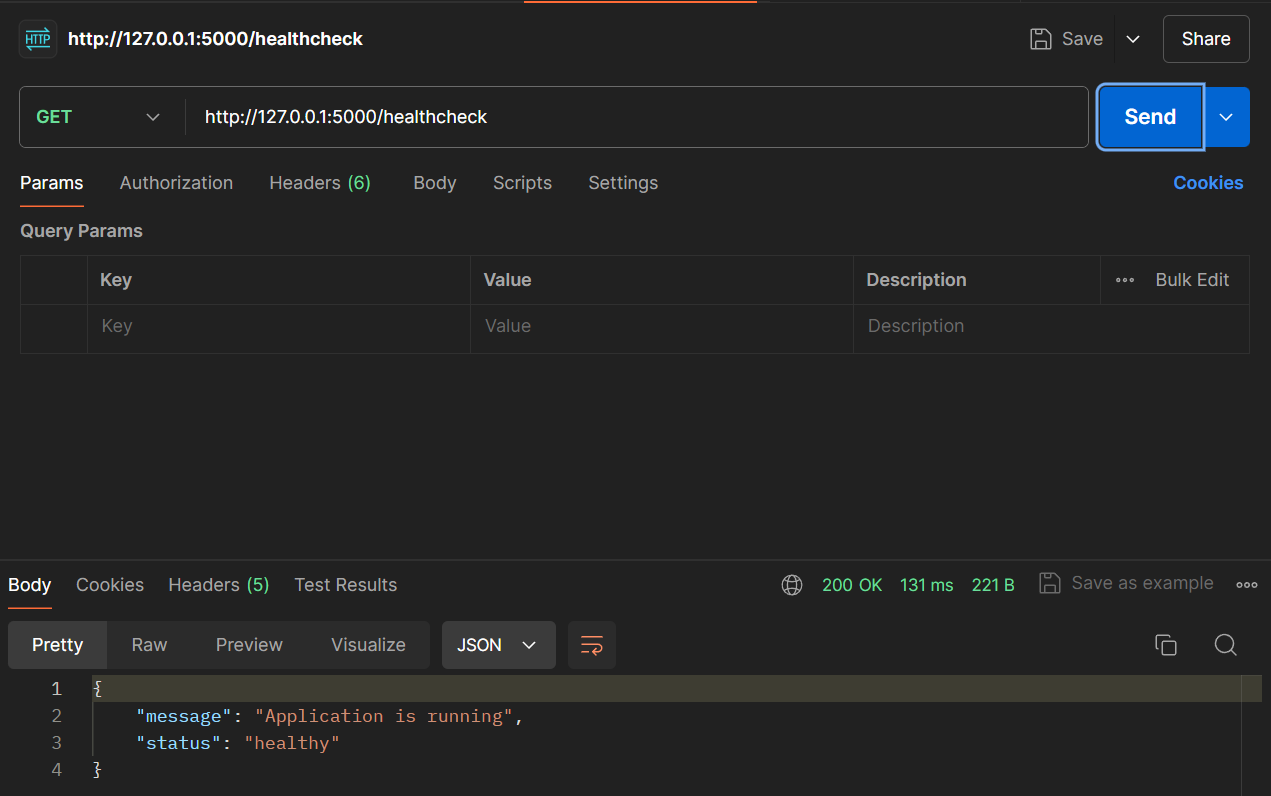

Thus, we can conclude API endpoints are working as intended.

## API Documentation

I have developed this API and web application to help us generate customer predictions using the best classification model we identified in the Data Science project.

URL: http://127.0.0.1:5000/

### /predict

You can use either the web app itself to make predictions or the API.

<b>Using web application frontend:</b>
<br>
To make predictions, fill in the form about customer details such as tenure, dependents, gender, services availed etc. Once form is filled, click the "Predict" button to have it generate and display a prediction regarding whether the customer will churn or not.

<b>Using /predict endpoint:</b>
<br>
Create a <strong>POST</strong> request with a request body containing a JSON object for all the input previously mentioned in the form and send it to the API. It will return a prediction as a JSON object.

### /healthcheck

It is a simple healthcheck API endpoint to ensure the API is working correctly. To use it, simply use a <strong>GET</strong> request on it and it will return a health_status JSON object if things are working smoothly.